# Predição Inicial

#### Alunos: Ellen Shen, Enzo Neto, Gabriel Huerta, Giulia Castro

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

In [2]:
top_2017 = pd.read_csv("top_2017.csv", index_col=1)
top_2018 = pd.read_csv('top_2018.csv', index_col=1)

### 2017

In [3]:
top_2017.head(3)

,id,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,,,,
Shape of You,7qiZfU4dY1lWllzX7mPBI,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581,0.0,0.0931,0.931,95.977,233713.0,4.0
Despacito - Remix,5CtI0qwDJkDQGwXD1H1cL,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229,0.0,0.0924,0.813,88.931,228827.0,4.0
Despacito (Featuring Daddy Yankee),4aWmUDTfIPGksMNLV2rQP,Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209,0.0,0.1120,0.846,177.833,228200.0,4.0


<IPython.core.display.Javascript object>


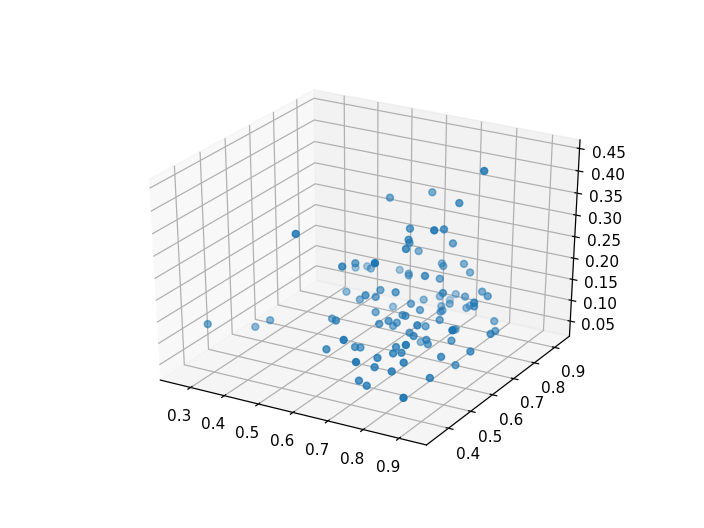

In [4]:
plt3d_2017 = plt.figure().gca(projection="3d")
plt3d_2017.scatter(top_2017.danceability, top_2017.energy, top_2017.liveness)

In [5]:
dados_entrada_2017 = top_2017.loc[:,("danceability", "energy", "liveness")]

In [6]:
three_means_2017 = cluster.MiniBatchKMeans(n_clusters=3)
three_means_2017.fit(dados_entrada_2017)
saida_2017 = three_means_2017.predict(dados_entrada_2017)
saida_2017

array([2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2,
       1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0,
       0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1], dtype=int32)

In [7]:
conjunto_2017 = dados_entrada_2017.copy()
conjunto_2017["saida"] = saida_2017
conjunto_2017.head()

,danceability,energy,liveness,saida
name,,,,
Shape of You,0.825,0.652,0.0931,2
Despacito - Remix,0.694,0.815,0.0924,0
Despacito (Featuring Daddy Yankee),0.660,0.786,0.1120,0
Something Just Like This,0.617,0.635,0.1640,1
I'm the One,0.609,0.668,0.1670,1


<IPython.core.display.Javascript object>


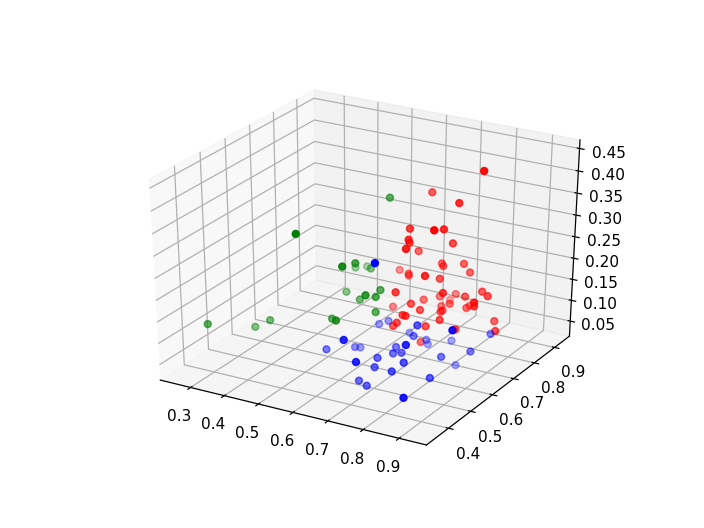

In [8]:
plt3d_2017 = plt.figure().gca(projection="3d")
grupo0_2017 = conjunto_2017[conjunto_2017.saida==0]
grupo1_2017 = conjunto_2017[conjunto_2017.saida==1]
grupo2_2017 = conjunto_2017[conjunto_2017.saida==2]

plt3d_2017.scatter(grupo0_2017.danceability, grupo0_2017.energy, grupo0_2017.liveness, color="r")
plt3d_2017.scatter(grupo1_2017.danceability, grupo1_2017.energy, grupo1_2017.liveness, color="g")
plt3d_2017.scatter(grupo2_2017.danceability, grupo2_2017.energy, grupo2_2017.liveness, color="b")

### 2018

In [9]:
top_2018.head(3)

,id,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,,,,,,,,,,,,,,,
God's Plan,6DCZcSspjsKoFjzjrWoCd,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
SAD!,3ee8Jmje8o58CHK66QrVC,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
rockstar (feat. 21 Savage),0e7ipj03S05BNilyu5bRz,Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0


<IPython.core.display.Javascript object>


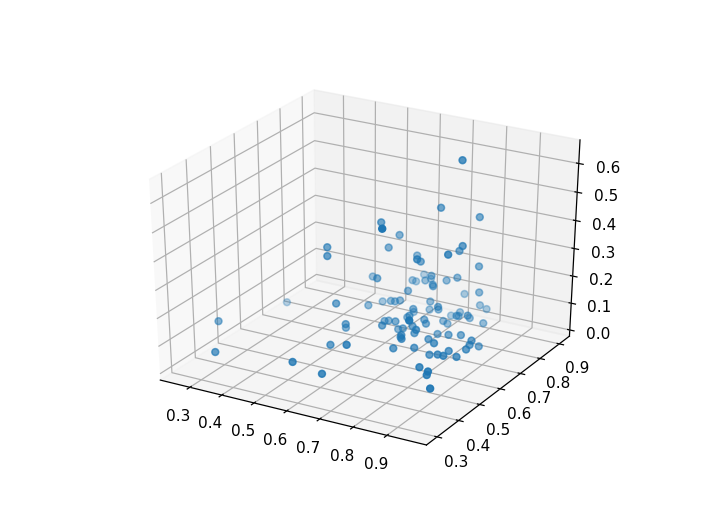

In [10]:
plt3d_2018 = plt.figure().gca(projection="3d")
plt3d_2018.scatter(top_2018.danceability, top_2018.energy, top_2018.liveness)

In [11]:
dados_entrada_2018 = top_2018.loc[:,("danceability", "energy", "liveness")]

In [12]:
three_means_2018 = cluster.MiniBatchKMeans(n_clusters=3)
three_means_2018.fit(dados_entrada_2018)
saida_2018 = three_means_2018.predict(dados_entrada_2018)
saida_2018

array([2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

In [13]:
conjunto_2018 = dados_entrada_2018.copy()
conjunto_2018["saida"] = saida_2018
conjunto_2018.head()

,danceability,energy,liveness,saida
name,,,,
God's Plan,0.754,0.449,0.552,2
SAD!,0.740,0.613,0.123,0
rockstar (feat. 21 Savage),0.587,0.535,0.131,1
Psycho (feat. Ty Dolla $ign),0.739,0.559,0.112,0
In My Feelings,0.835,0.626,0.396,2


<IPython.core.display.Javascript object>


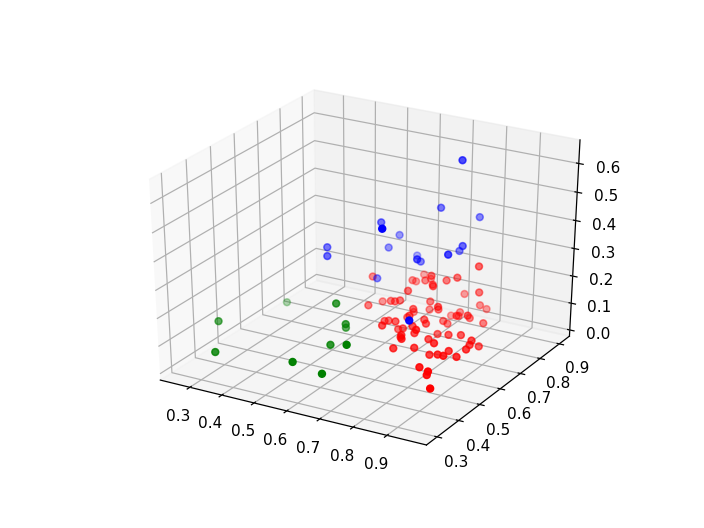

In [14]:
plt3d_2018 = plt.figure().gca(projection="3d")
grupo0_2018 = conjunto_2018[conjunto_2018.saida==0]
grupo1_2018 = conjunto_2018[conjunto_2018.saida==1]
grupo2_2018 = conjunto_2018[conjunto_2018.saida==2]

plt3d_2018.scatter(grupo0_2018.danceability, grupo0_2018.energy, grupo0_2018.liveness, color="r")
plt3d_2018.scatter(grupo1_2018.danceability, grupo1_2018.energy, grupo1_2018.liveness, color="g")
plt3d_2018.scatter(grupo2_2018.danceability, grupo2_2018.energy, grupo2_2018.liveness, color="b")

## Histogramas

In [15]:
plt.rcParams["figure.figsize"] = [5,3]
plt.rcParams["axes.titlesize"] = 10
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["lines.markersize"] = 10

### 2017

<IPython.core.display.Javascript object>


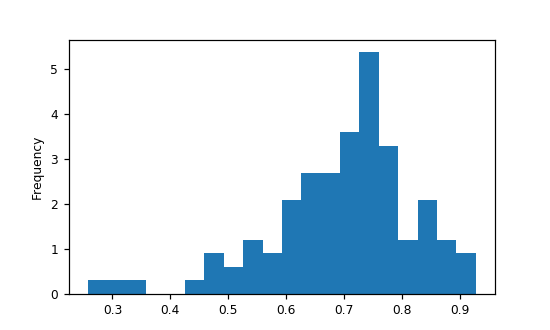

In [19]:
top_2017.danceability.plot.hist(density=True, bins=20)

<IPython.core.display.Javascript object>


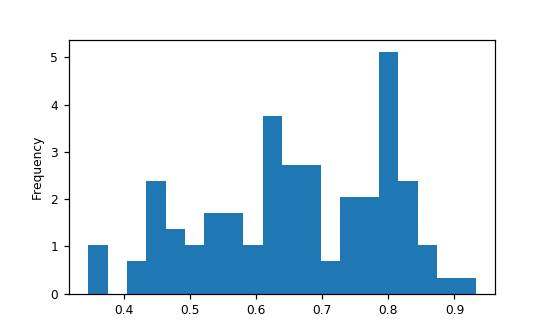

In [20]:
top_2017.energy.plot.hist(density=True, bins=20)

<IPython.core.display.Javascript object>


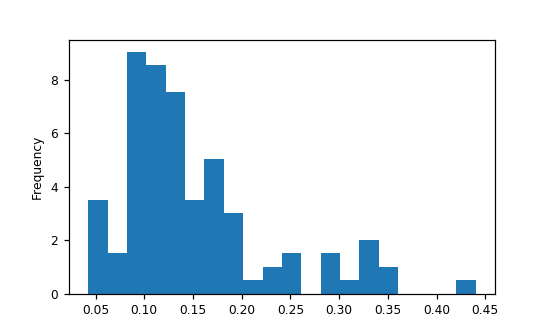

In [21]:
top_2017.liveness.plot.hist(density=True, bins=20)

### 2018

In [22]:
top_2018.danceability.plot.hist(density=True, bins=20)

<IPython.core.display.Javascript object>

In [ ]:
top_2018.energy.plot.hist(density=True, bins=20)

In [ ]:
top_2018.liveness.plot.hist(density=True, bins=20)